<a href="https://colab.research.google.com/github/FHnt97/RUG_TOM_SIO/blob/main/Assignment_A_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment A.4 Part 2

**Authors:** Group 2.1

*   V. Stupko			S2367246
*   S. Zuidhoek			S4190947
*   R. van der Straten		S3125327	
*   F. Höhne Tarragona		S4605632

**Course:** Smart Industry Operations *EBM223A05.2021-2022.1B*

**Lecturer:** *Dr Christos Emmanouilidis*

***2022-01-14***

<br>

In this part of the assignement, we are asked to classify data into "accept offer", and "don't accept offer" based on historical data. 

We have been given another set of employees which are preselected, and instead of making them a specific offer, ywe ou are asking them to request a certain salary level. 
The objective is to analyse weather or not their salary expectations are within reason and will be accepted. 

The report is divided into secitons as follows:
1. Importing opf libraries and data
2. Data analysis and basic data clearning
3. Exploraroty analysis of data (correclation analysis)
4. Set-up of classification model
5. Results and conclusion



---



## 1. Importing of libraries and data set

In [61]:
# import all needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
# conenct to drive to access files in the sharedrive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# read csv 
df = pd.read_csv('/content/drive/Shareddrives/SIO - Group 2.1 (S1b)/A4 (14.01.2022)/A4_3.csv', sep=',')



---


## 2. Initial data analysis and cleaning

For the initial data analysis, we will look solely for extreme discrepancies in the dataset. This includes:
- if needed, removing NaN values
- ensuring the correct Dtype for further data analysis
- if needed, removing outliers in the data (negative values)
- if needed, re-naming attribtues in order to better classify records (gender, department, education level)




In [62]:
# check for correct formatting of cells
# check for Na values (no NaNs in dataset therefore no further action is taken)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   RecID                400 non-null    object        
 1   First Name           400 non-null    object        
 2   Surname              400 non-null    object        
 3   Gender               400 non-null    object        
 4   Age                  400 non-null    float64       
 5   Date of birth        400 non-null    datetime64[ns]
 6   Years of experience  400 non-null    float64       
 7   Education Level      400 non-null    float64       
 8   Department           400 non-null    object        
 9   Country              400 non-null    object        
 10  Performance          400 non-null    float64       
 11  EN                   400 non-null    float64       
 12  F                    400 non-null    float64       
 13  SP                   400 non-null  

In [63]:
df.columns

Index(['RecID', 'First Name', 'Surname', 'Gender', 'Age', 'Date of birth',
       'Years of experience', 'Education Level', 'Department', 'Country',
       'Performance', 'EN', 'F', 'SP', 'NL', 'GE', 'IT', 'Assembly',
       'Machining', 'Welding', 'Additive', 'Painting', 'Control', 'Quality',
       'Planning', 'Services', 'Shipping', 'Total', 'Check', 'Total Languages',
       'Total Skills'],
      dtype='object')

In [64]:
# change 'Date of birth' to DateTime
df['Date of birth'] = pd.to_datetime(df['Date of birth'])

'''# attributes 11-26 ('EN' to 'Shipping') can be changes to Bool for ease of use
lst = ['EN', 'F', 'SP', 'NL', 'GE', 'IT', 'Assembly', 
   'Machining', 'Welding', 'Additive', 'Painting', 
   'Control', 'Quality','Planning', 'Services', 'Shipping']
df[lst] = df[lst].astype('bool')'''

"# attributes 11-26 ('EN' to 'Shipping') can be changes to Bool for ease of use\nlst = ['EN', 'F', 'SP', 'NL', 'GE', 'IT', 'Assembly', \n   'Machining', 'Welding', 'Additive', 'Painting', \n   'Control', 'Quality','Planning', 'Services', 'Shipping']\ndf[lst] = df[lst].astype('bool')"

In [65]:
# check for consistent input in cells
df.head()

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Total,Check,Total Languages,Total Skills
0,1836426AQT,Maurice,May,male,38.0,1983-07-05,8.0,5.0,operations,United Kingdom,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43804.26346,0.0,1.0,3.0
1,5085160TGY,Joseph,Guarnieri,male,27.0,1994-11-12,1.0,7.0,design,Republic of Congo,11.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60599.20530,0.0,1.0,9.0
2,3926862AMS,Carole,Adams,female,64.0,1957-12-07,0.0,5.0,design,Republic of South Africa,78.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,57368.11986,0.0,3.0,4.0
3,4283844SGJ,Adam,Robinson,male,60.0,1961-06-03,34.0,6.0,innovation,Italy,84.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,80903.19112,0.0,6.0,6.0
4,4584787SSA,Rubye,Peele,female,24.0,1997-01-01,0.0,8.0,marketing,Republic of South Africa,78.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,75970.50355,0.0,3.0,4.0


In [66]:
# gender needs to be made consistent 
df = df.replace({'Gender': {'f': 'female', 'm': 'male'}})

In [67]:
# check for no negative values/ alomalies in numeric columns
df.describe()

,Age,Years of experience,Education Level,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Total,Check,Total Languages,Total Skills
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,500.000000,500.000000
mean,41.545000,10.040000,6.007500,53.160000,0.520000,0.510000,0.555000,0.50750,0.515000,0.510000,0.455000,0.550000,0.525,0.51250,0.505000,0.482500,0.532500,0.517500,0.49750,0.50750,61025.432025,0.245000,2.494000,4.068000
std,13.922556,9.312368,1.393664,29.076072,0.500226,0.500526,0.497588,0.50057,0.500401,0.500526,0.498595,0.498117,0.500,0.50047,0.500601,0.500319,0.499567,0.500319,0.50062,0.50057,11331.891754,0.430626,1.652703,2.470543
min,18.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,39095.600020,0.000000,0.000000,0.000000
25%,30.000000,2.000000,5.000000,27.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,52204.058650,0.000000,1.000000,3.000000
50%,40.500000,8.000000,6.000000,52.500000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000,1.00000,1.000000,0.000000,1.000000,1.000000,0.00000,1.00000,59291.760875,0.000000,3.000000,5.000000
75%,53.000000,16.000000,7.000000,80.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,70560.953682,0.000000,4.000000,6.000000
max,67.000000,35.000000,8.000000,100.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,87608.476140,1.000000,6.000000,10.000000


In [68]:
# check number of departments 
df.Department.unique()

array(['operations', 'design', 'innovation', 'marketing', 'purchasing',
       'sales', 'finance', nan], dtype=object)

In [69]:
# check number of education levels 
df['Education Level'].unique()

array([ 5.,  7.,  6.,  8.,  4., nan])

In [70]:
# for the exploratory analysis, the sum of languages and sum of skills for each employee has been added to each data point
lst_lan = ['EN', 'F', 'SP', 'NL', 'GE', 'IT']
df['Total Languages'] = df[lst_lan].sum(1, numeric_only=True)

lst_skills = ['Assembly', 'Machining', 'Welding', 'Additive', 'Painting', 'Control', 'Quality','Planning', 'Services', 'Shipping']
df['Total Skills'] = df[lst_skills].sum(1, numeric_only=True)

In [71]:
df.head()

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Total,Check,Total Languages,Total Skills
0,1836426AQT,Maurice,May,male,38.0,1983-07-05,8.0,5.0,operations,United Kingdom,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43804.26346,0.0,1.0,3.0
1,5085160TGY,Joseph,Guarnieri,male,27.0,1994-11-12,1.0,7.0,design,Republic of Congo,11.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60599.20530,0.0,1.0,9.0
2,3926862AMS,Carole,Adams,female,64.0,1957-12-07,0.0,5.0,design,Republic of South Africa,78.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,57368.11986,0.0,3.0,4.0
3,4283844SGJ,Adam,Robinson,male,60.0,1961-06-03,34.0,6.0,innovation,Italy,84.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,80903.19112,0.0,6.0,6.0
4,4584787SSA,Rubye,Peele,female,24.0,1997-01-01,0.0,8.0,marketing,Republic of South Africa,78.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,75970.50355,0.0,3.0,4.0


## 3. Exploraroty analysis of data

We start the exploratory analysis with the following hypotheses:
- **H1: Sallary is strongly correlated with the perfromance score**
- **H2: Sallary is correlated with the level of education** 
-  **H3: Sallary trends change for each department**

The exploratory data analysis has been divided into two parts:

1.   Distribution analysis through histogramms and scatter plots (using a pair plot)
2.   Correlation analysis


The objective of this analysis is to find attributes by which the different data points can be classified.
This classification will later on allow us to reject or accept a salary offer. 

**Specific attributes, namely gender, age, and coutnry of residency, are purposefully NOT going to be analysed/included in the classifications, as these attributes should NOT have an influence on the assigned total salary, even if the historical data indicates a correlation or trend.**


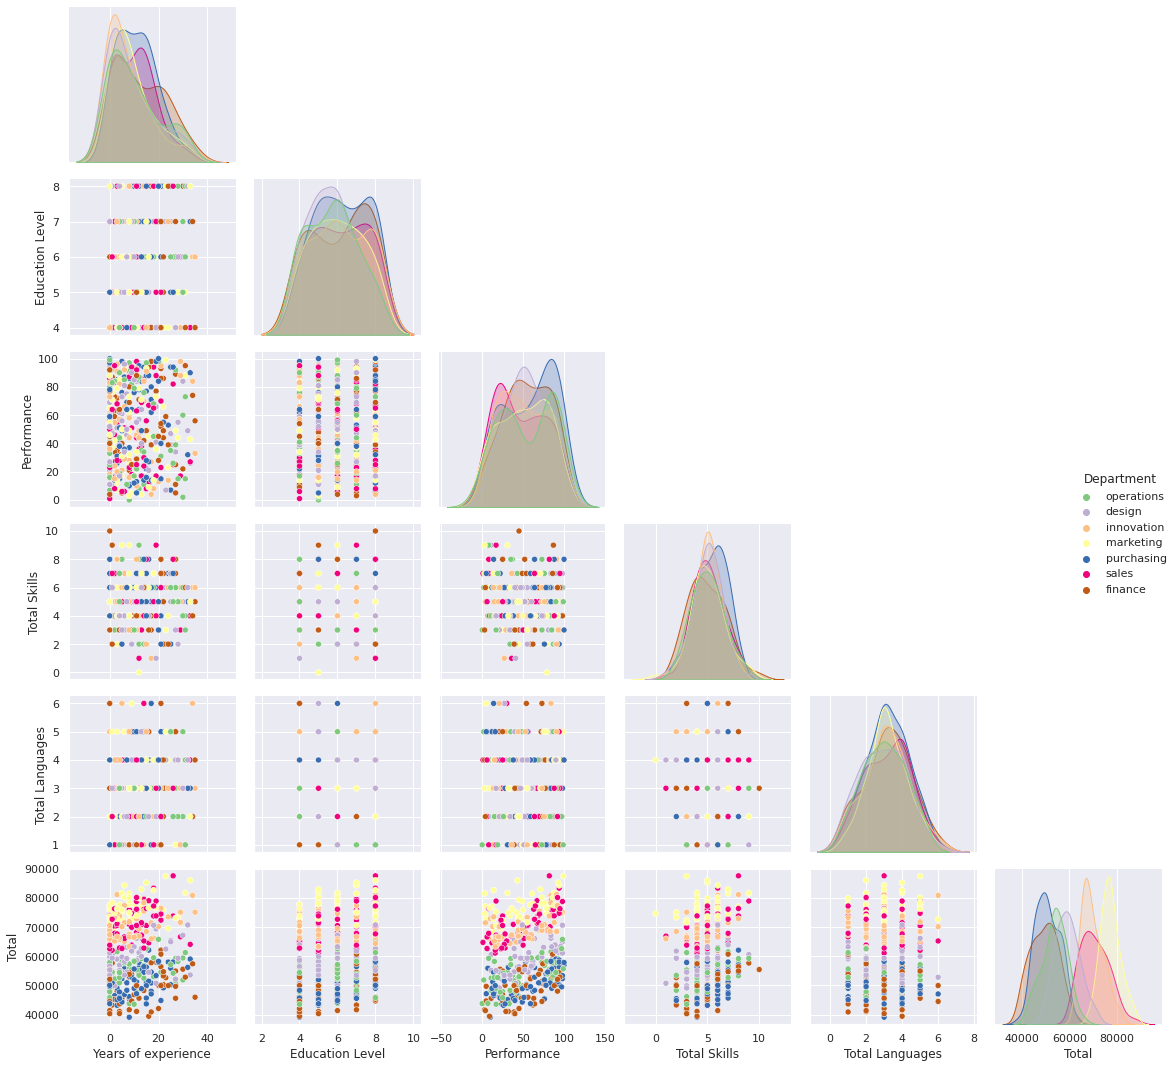

In [106]:
# Proving H1 and 2 --> plot numerical attributes that might have a relationship with 'Total'
# Proving H3 --> colour coordinate by department 
cols = ['Years of experience','Education Level', 'Department', 'Performance', 'Total Skills', 'Total Languages', 'Total']

sns.set(context='notebook')
sns.pairplot(df[cols], hue = 'Department', palette="Accent", corner=True, height=2.5)
plt.tight_layout()

When looking at the last row from the diagram above, which compares the attribute 'Total' to all other attributes, we see that H1, H2 and H3 are correct:
- **there is a positive correlation between Total and Perfromance**
- **there is a positive correlation between Total and Education Level**
- We can see a bimodal distribution when looking at the histogram for Total. From said Histogram, **we see that the colours pink, yellow, and orange (Sales, marketing, and innovation respectively) have an overall higher 'Total' than the other Departments.** A similar trend can be seen in the graph for Total/ Perfromance (3rd on the last row) too, where the top half of the scatter plots are marked in those colours. 

This analysis provides a solid base for the classification. **Salary predictions can be classified firstly by Department and Perfromance.**

Further analysis to find individual specifications for weach department will follow below. 

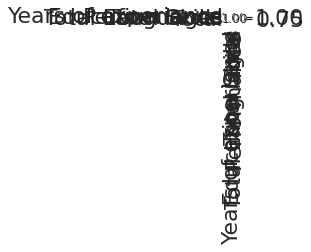

In [95]:
#showing correlation among variables
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 12},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

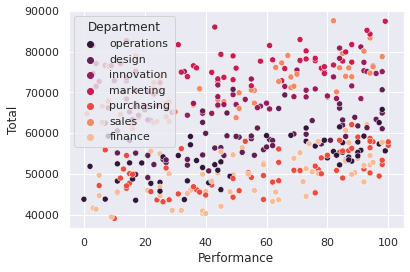